<a href="https://colab.research.google.com/github/elqvixote/CODIGO_TRADING_R_PLATZI/blob/master/02_Estimaci%C3%B3n_por_Intervalos_Saber11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paquetes

install.packages("devtools")
devtools::install_github("nebulae-co/saber")

library("saber")

# Carga de datos

data("SB11_20112")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




✔  checking for file ‘/tmp/Rtmp3j2v14/remotes3867ac1a96/nebulae-co-saber-04cded4/DESCRIPTION’
─  preparing ‘saber’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘saber_0.0.0.9500.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
table(SB11_20112$ECON_SN_INTERNET)


     0      1 
329833 210552 

In [ ]:
tamano_muestral <- 300
iteraciones <- 100
pob_sn_in <- SB11_20112$FISICA_PUNT[SB11_20112$ECON_SN_INTERNET == 0]
media_pob_sn_in <- mean(pob_sn_in, na.rm = TRUE)
media_pob_sn_in

[1] 42.98349

In [ ]:
pob_cn_in <- SB11_20112$FISICA_PUNT[SB11_20112$ECON_SN_INTERNET == 1]
media_pob_cn_in <- mean(pob_cn_in, na.rm = TRUE)
media_pob_cn_in

[1] 46.29835

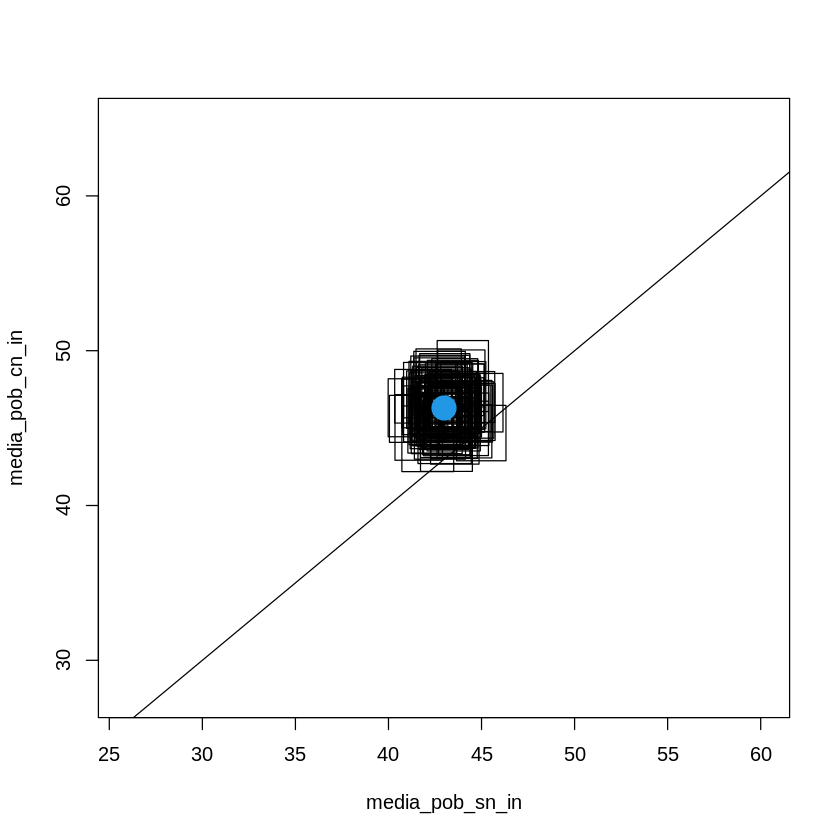

In [ ]:
plot(media_pob_sn_in, media_pob_cn_in, col = 4, pch = 20)
abline(0, 1)

for(i in seq_len(iteraciones)){
  muestra <- sample(seq_len(nrow(SB11_20112)), tamano_muestral)

  cuales_sn_in <- seq_len(nrow(SB11_20112)) %in% muestra & SB11_20112$ECON_SN_INTERNET == 0
  muestra_sn_in <- SB11_20112$FISICA_PUNT[cuales_sn_in]
  media_muestral_sn_in <- mean(muestra_sn_in, na.rm = TRUE)

  t_test_sn_in <- t.test(muestra_sn_in)
  intervalo_sn_in <- t_test_sn_in$conf.int
  LI_sn_in <- min(intervalo_sn_in)
  LS_sn_in <- max(intervalo_sn_in)

  cuales_cn_in <- seq_len(nrow(SB11_20112)) %in% muestra & SB11_20112$ECON_SN_INTERNET == 1
  muestra_cn_in <- SB11_20112$FISICA_PUNT[cuales_cn_in]
  media_muestral_cn_in <- mean(muestra_cn_in, na.rm = TRUE)

  t_test_cn_in <- t.test(muestra_cn_in)
  intervalo_cn_in <- t_test_cn_in$conf.int
  LI_cn_in <- min(intervalo_cn_in)
  LS_cn_in <- max(intervalo_cn_in)

  rect(LI_sn_in, LI_cn_in, LS_sn_in, LS_cn_in)
}

points(media_pob_sn_in, media_pob_cn_in, col = 4, pch = 20, cex = 4)